In [1]:
import numpy, gc
from tgnn.util import crystal_conv as cc
import tgnn.util.trainer as tr
import torch.nn
from torch.utils.data import DataLoader
from tgnn.model.TGNN import TGNN
from tgnn.model.CGCNN import CGCNN
from tgnn.util.AdaBound import AdaBound

root = 'c:/WORKSPACE_KRICT/DATA/data_snu/poscar'

gc.collect()
torch.cuda.empty_cache()
num_epochs = 300
batch_size = 32

cc.load_mat_atom_feats()
list_test_mae = list()
list_test_rmse = list()

In [2]:
train_data, val_data, test_data = cc.load_dataset(root, target_idx=2, ref_idx=1, radius=8, train_ratio=0.8, val_ratio=0.2, model_type='cgcnn')

for n in range(0, 1):
    train_data_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, collate_fn=tr.collate_cgcnn)
    val_data_loader = DataLoader(val_data, batch_size=batch_size, collate_fn=tr.collate_cgcnn)
    test_data_loader = DataLoader(test_data, batch_size=batch_size, collate_fn=tr.collate_cgcnn)

    model = CGCNN(cc.num_atom_feats, cc.num_edge_feats, 1).cuda()
    optimizer = AdaBound(model.parameters(), lr=1e-6, weight_decay=1e-8)
    # optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-8)
    criterion = torch.nn.L1Loss()

    for epoch in range(0, num_epochs):
        train_loss = tr.train(model, optimizer, train_data_loader, criterion)
        val_loss, val_rmse, _, _, _ = tr.test(model, val_data_loader, criterion)
        print('Epoch [{}/{}]\tTrain loss: {:.4f}\tVal loss: {:.4f} ({:.4f})'
              .format(epoch + 1, num_epochs, train_loss, val_loss, val_rmse))

        torch.save(model.state_dict(), 'output/cgcnn/model.pt.{:05d}'.format(epoch))
        torch.save(model.state_dict(), 'output/cgcnn/model.pt')
        test_loss, test_rmse, idxs, targets, preds = tr.test(model, test_data_loader, criterion)
        numpy.savetxt('output/cgcnn/pred_results.{:05d}.csv'.format(epoch), numpy.hstack([idxs, targets, preds]), delimiter=',')


Complete loading 100th crystal.
Complete loading 200th crystal.
Complete loading 300th crystal.
Complete loading 400th crystal.
Complete loading 500th crystal.
Complete loading 600th crystal.
Complete loading 700th crystal.
Complete loading 800th crystal.
Complete loading 900th crystal.
Complete loading 1000th crystal.
Complete loading 1100th crystal.
Complete loading 1200th crystal.
Complete loading 1300th crystal.
Complete loading 1400th crystal.
Complete loading 1500th crystal.
Complete loading 1600th crystal.
Complete loading 1700th crystal.
Complete loading 1800th crystal.
Complete loading 1900th crystal.
Complete loading 2000th crystal.
Complete loading 2100th crystal.
Complete loading 2200th crystal.
Complete loading 2300th crystal.
Complete loading 2400th crystal.
Complete loading 2500th crystal.
Complete loading 2600th crystal.
Complete loading 2700th crystal.
Complete loading 2800th crystal.
Complete loading 2900th crystal.
Complete loading 3000th crystal.
Complete loading 31

c:\WORKSPACE_KRICT\CODES\band_gap_model\notebooks\tgnn\util\AdaBound.py:91: UserWarning: This overload of add is deprecated:
	add(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add(Tensor other, *, Number alpha) (Triggered internally at  ..\torch\csrc\utils\python_arg_parser.cpp:1050.)
  grad = grad.add(group['weight_decay'], p.data)


Epoch [1/300]	Train loss: 1.1949	Val loss: 0.9200 (1.1556)
Epoch [2/300]	Train loss: 0.8551	Val loss: 1.0227 (1.6787)
Epoch [3/300]	Train loss: 0.8971	Val loss: 0.8424 (1.3370)
Epoch [4/300]	Train loss: 0.8449	Val loss: 0.7847 (1.0338)
Epoch [5/300]	Train loss: 0.8477	Val loss: 0.8596 (1.1511)
Epoch [6/300]	Train loss: 0.8361	Val loss: 0.7649 (1.1792)
Epoch [7/300]	Train loss: 0.8095	Val loss: 0.8785 (1.1172)
Epoch [8/300]	Train loss: 0.7949	Val loss: 0.7825 (0.9714)
Epoch [9/300]	Train loss: 0.7913	Val loss: 0.9241 (1.1129)
Epoch [10/300]	Train loss: 0.8320	Val loss: 1.1635 (1.3615)
Epoch [11/300]	Train loss: 0.7763	Val loss: 0.8167 (1.1413)
Epoch [12/300]	Train loss: 0.7849	Val loss: 0.7318 (1.0970)
Epoch [13/300]	Train loss: 0.7579	Val loss: 0.8074 (0.9669)
Epoch [14/300]	Train loss: 0.7743	Val loss: 0.7543 (1.2903)
Epoch [15/300]	Train loss: 0.7552	Val loss: 0.7363 (1.3759)
Epoch [16/300]	Train loss: 0.7498	Val loss: 0.7028 (0.9589)
Epoch [17/300]	Train loss: 0.7500	Val loss: 0.712

In [2]:
gc.collect()
torch.cuda.empty_cache()
num_epochs = 300
batch_size = 32

cc.load_mat_atom_feats()
list_test_mae = list()
list_test_rmse = list()

train_data, val_data, test_data = cc.load_dataset(root, target_idx=2, ref_idx=1, radius=4, train_ratio=0.8, val_ratio=0.2, model_type='tgnn')

Complete loading 100th crystal.
Complete loading 200th crystal.
Complete loading 300th crystal.
Complete loading 400th crystal.
Complete loading 500th crystal.
Complete loading 600th crystal.
Complete loading 700th crystal.
Complete loading 800th crystal.
Complete loading 900th crystal.
Complete loading 1000th crystal.
Complete loading 1100th crystal.
Complete loading 1200th crystal.
Complete loading 1300th crystal.
Complete loading 1400th crystal.
Complete loading 1500th crystal.
Complete loading 1600th crystal.
Complete loading 1700th crystal.
Complete loading 1800th crystal.
Complete loading 1900th crystal.
Complete loading 2000th crystal.
Complete loading 2100th crystal.
Complete loading 2200th crystal.
Complete loading 2300th crystal.
Complete loading 2400th crystal.
Complete loading 2500th crystal.
Complete loading 2600th crystal.
Complete loading 2700th crystal.
Complete loading 2800th crystal.
Complete loading 2900th crystal.
Complete loading 3000th crystal.
Complete loading 31

In [3]:
for n in range(0, 1):
    train_data_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, collate_fn=tr.collate)
    val_data_loader = DataLoader(val_data, batch_size=batch_size, collate_fn=tr.collate)
    test_data_loader = DataLoader(test_data, batch_size=batch_size, collate_fn=tr.collate)

    model = TGNN(cc.num_atom_feats, cc.num_bond_feats, 1).cuda()
    optimizer = AdaBound(model.parameters(), lr=1e-6, weight_decay=1e-8)
    # optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-8)
    criterion = torch.nn.L1Loss()

    for epoch in range(0, num_epochs):
        train_loss = tr.train(model, optimizer, train_data_loader, criterion)
        val_loss, val_rmse, _, _, _ = tr.test(model, val_data_loader, criterion)
        print('Epoch [{}/{}]\tTrain loss: {:.4f}\tVal loss: {:.4f} ({:.4f})'
              .format(epoch + 1, num_epochs, train_loss, val_loss, val_rmse))

        torch.save(model.state_dict(), 'output/tgnn/model.pt.{:05d}'.format(epoch))
        torch.save(model.state_dict(), 'output/tgnn/model.pt')
#        test_loss, test_rmse, idxs, targets, preds = tr.test(model, test_data_loader, criterion)
#        numpy.savetxt('output/tgnn/pred_results.{:05d}.csv'.format(epoch), numpy.hstack([idxs, targets, preds]), delimiter=',')


c:\WORKSPACE_KRICT\CODES\band_gap_model\notebooks\tgnn\util\AdaBound.py:91: UserWarning: This overload of add is deprecated:
	add(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add(Tensor other, *, Number alpha) (Triggered internally at  ..\torch\csrc\utils\python_arg_parser.cpp:1050.)
  grad = grad.add(group['weight_decay'], p.data)


Epoch [1/300]	Train loss: 1.8279	Val loss: 0.9435 (1.1263)
Epoch [2/300]	Train loss: 0.9123	Val loss: 0.8673 (1.1053)
Epoch [3/300]	Train loss: 0.8726	Val loss: 0.8369 (1.0562)
Epoch [4/300]	Train loss: 0.8718	Val loss: 0.8048 (1.0315)
Epoch [5/300]	Train loss: 0.8489	Val loss: 0.8960 (1.1108)
Epoch [6/300]	Train loss: 0.8479	Val loss: 0.8266 (0.9035)
Epoch [7/300]	Train loss: 0.8246	Val loss: 0.7649 (0.8614)
Epoch [8/300]	Train loss: 0.8096	Val loss: 0.8238 (0.9355)
Epoch [9/300]	Train loss: 0.7907	Val loss: 0.7561 (0.7794)
Epoch [10/300]	Train loss: 0.7898	Val loss: 0.7261 (0.7705)
Epoch [11/300]	Train loss: 0.7902	Val loss: 0.7256 (0.7586)
Epoch [12/300]	Train loss: 0.7681	Val loss: 0.7398 (0.7820)
Epoch [13/300]	Train loss: 0.7789	Val loss: 0.7142 (0.7971)
Epoch [14/300]	Train loss: 0.7582	Val loss: 0.8047 (0.8290)
Epoch [15/300]	Train loss: 0.7634	Val loss: 0.8314 (0.8507)
Epoch [16/300]	Train loss: 0.7465	Val loss: 0.6894 (0.8127)
Epoch [17/300]	Train loss: 0.7336	Val loss: 0.683

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import re
%matplotlib inline

ptrn = re.compile(r'[\[\]\/\(\)]')
loss = dict()
for fn in ['loss_cgcnn.txt','loss_cgcnn_wo_ref.txt','loss_tgnn.txt','loss_tgnn_wo_ref.txt']:
    with open(fn) as f:
        lines = ptrn.sub(' ', f.read()).split('Epoch')
    lines = [l.split() for l in lines if len(l.split()) > 5]
    loss[fn] = np.array(lines).T[[0, 4, 7, 8], :].astype(float)

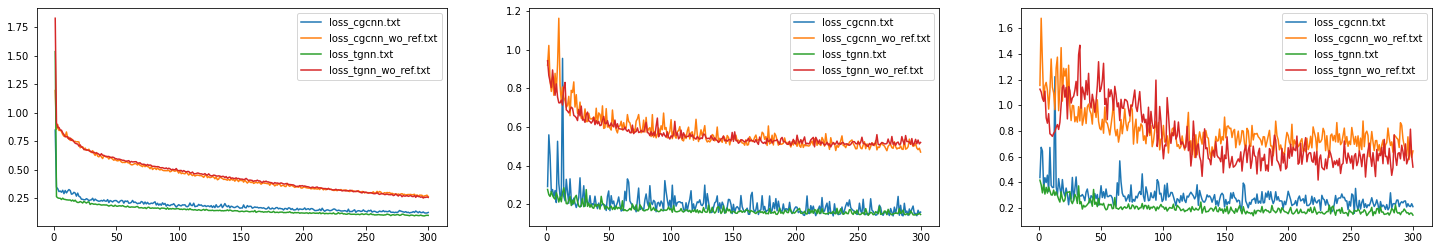

In [23]:
f, axs = plt.subplots(1, 3, figsize=(25,4))
for dtype, data in loss.items():
    x, train_mae, val_mae, val_rmse = data
    axs[0].plot(x, train_mae, label=dtype)
    axs[1].plot(x, val_mae, label=dtype)
    axs[2].plot(x, val_rmse, label=dtype)
for ax in axs: ax.legend(loc='upper right')

In [15]:
lines

[['1', '300', 'Train', 'loss:', '1.8279', 'Val', 'loss:', '0.9435', '1.1263'],
 ['2', '300', 'Train', 'loss:', '0.9123', 'Val', 'loss:', '0.8673', '1.1053'],
 ['3', '300', 'Train', 'loss:', '0.8726', 'Val', 'loss:', '0.8369', '1.0562'],
 ['4', '300', 'Train', 'loss:', '0.8718', 'Val', 'loss:', '0.8048', '1.0315'],
 ['5', '300', 'Train', 'loss:', '0.8489', 'Val', 'loss:', '0.8960', '1.1108'],
 ['6', '300', 'Train', 'loss:', '0.8479', 'Val', 'loss:', '0.8266', '0.9035'],
 ['7', '300', 'Train', 'loss:', '0.8246', 'Val', 'loss:', '0.7649', '0.8614'],
 ['8', '300', 'Train', 'loss:', '0.8096', 'Val', 'loss:', '0.8238', '0.9355'],
 ['9', '300', 'Train', 'loss:', '0.7907', 'Val', 'loss:', '0.7561', '0.7794'],
 ['10', '300', 'Train', 'loss:', '0.7898', 'Val', 'loss:', '0.7261', '0.7705'],
 ['11', '300', 'Train', 'loss:', '0.7902', 'Val', 'loss:', '0.7256', '0.7586'],
 ['12', '300', 'Train', 'loss:', '0.7681', 'Val', 'loss:', '0.7398', '0.7820'],
 ['13', '300', 'Train', 'loss:', '0.7789', 'Val',